In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
Data  = pd.read_csv("level_3_input/train.csv", skiprows=1, header=None)

Images = Data[:Data.shape[0]//2]
Images = np.array(Images, dtype='float')


Labels=Data[0][(Data.shape[0]//2):Data.shape[0]]
Labels = np.array(Labels, dtype='float')

print(Images.shape)
print(Labels.shape)

(10000, 5488)
(10000,)


In [3]:
Data_Test  = pd.read_csv("level_3_input/level_3_1.csv", skiprows=1, header=None)

Data_Test = Data_Test[:Data_Test.shape[0]]
Data_Test = np.array(Data_Test, dtype='float')

print(Data_Test.shape)

(3000, 5488)


In [15]:
x_train = Images.copy()
x_test = Data_Test.copy()

y_train = np.array(Labels)

In [16]:
input_shape = (28,196, 1)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = tf.reshape(x_train,[-1,28,196,1])
x_test = tf.reshape(x_test,[-1,28,196,1])


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (10000, 28, 196, 1)
10000 train samples
3000 test samples


In [8]:
Images


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

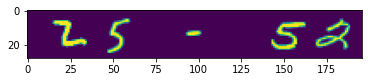

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3000])

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.15),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.15),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.15),
        layers.Conv2D(128, kernel_size=(3, 5), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(1, 4)),
        layers.Dropout(0.15),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Dropout(0.15),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),

        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 196, 16)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 98, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 98, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 98, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 49, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 49, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 49, 64)         1

In [ ]:
inp = keras.Input(shape=input_shape)

x = layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same")(inp)
xc = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same")(xc)
x = layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = x+layers.Conv2D(16, kernel_size=(1, 1), padding="same")(xc)
xc = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(xc)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = x+layers.Conv2D(32, kernel_size=(1, 1), padding="same")(xc)
xc = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(xc)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = x+layers.Conv2D(32, kernel_size=(1, 1), padding="same")(xc)
xc = layers.MaxPooling2D(pool_size=(1, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(xc)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = x+layers.Conv2D(64, kernel_size=(1, 1), padding="same")(xc)
x = layers.Flatten()(x)

x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.75)(x)

out = layers.Dense(1, activation="softmax")(x)

model = keras.Model(inp, out)

model.summary()

In [13]:
x_train.shape

TensorShape([10000, 28, 196])

In [17]:
batch_size = 32

epochs = 30
Check = keras.callbacks.ModelCheckpoint(
    "best.h5", monitor="val_loss", verbose=2, save_best_only=True,
    save_weights_only=True, mode='max', save_freq='epoch',
)

Plateau = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)


model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mse'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[Check, Plateau])

Epoch 1/30
250/250 [==============================] - ETA: 0s - loss: 0.0461 - mse: 0.0461
Epoch 00001: val_loss improved from -inf to 0.02602, saving model to best.h5
250/250 [==============================] - 17s 69ms/step - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2/30
250/250 [==============================] - ETA: 0s - loss: 0.0195 - mse: 0.0195
Epoch 00002: val_loss did not improve from 0.02602
250/250 [==============================] - 17s 69ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3/30
250/250 [==============================] - ETA: 0s - loss: 0.0106 - mse: 0.0106
Epoch 00003: val_loss did not improve from 0.02602
250/250 [==============================] - 17s 69ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 4/30
250/250 [==============================] - ETA: 0s - loss: 0.0083 - mse: 0.0083
Epoch 00004: val_loss did not improve from 0.02602
250/250 [============================

In [18]:
model.load_weights("best.h5")

y_hat = model.predict(x_test)
rounded = tf.cast(tf.math.round(y_hat), tf.int32)
np.savetxt("level_3_output/Level_3_1_Result.csv", rounded, fmt='%i', delimiter="\n", )
